In [1]:
import math
import torch
import torch.nn.functional as F
from torchvision import models, transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
model = models.vgg16(pretrained=True)
# vgg19, resnet - trained on coco or imagenet


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /home/meena/.cache/torch/checkpoints/vgg16-397923af.pth


In [8]:
model
# model parameters decides frames per second

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

(64, 3, 3, 3)


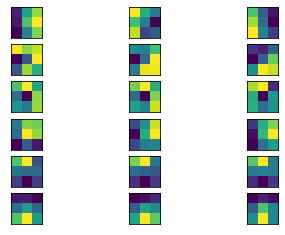

In [5]:
#Visualize the weights of different layers
layer_idx = 0
filter_index = 0 # Which filter in this block would you like to visualise?

# Direct access to the weight. Might not work with other networks like ResNet
filters = model.features[layer_idx].weight
np_filters = filters.detach().numpy()

# Grab the filters and biases for that layer
#for name, module in model._modules.items():
#    for idx, layer in enumerate(module.children(), start=0):
#        print(type(idx), layer_idx)
#        if idx == layer_idx:
#            filters = layer.weight
#            break

print(np_filters.shape)
# Normalize filter values to a range of 0 to 1 so we can visualize them
f_min, f_max = np.amin(np_filters), np.amax(np_filters)
np_filters = (np_filters - f_min) / (f_max - f_min)

# Plot first few filters
n_filters, index = 6, 1
for i in range(n_filters):
    f = np_filters[i, :, :, :]
    
    # Plot each channel separately
    for j in range(3):

        ax = plt.subplot(n_filters, 3, index)
        ax.set_xticks([])
        ax.set_yticks([])
        
        plt.imshow(f[j, :, :], cmap='viridis')
        index += 1
        
plt.show()

In [ ]:
# parms = sum(p.numel)

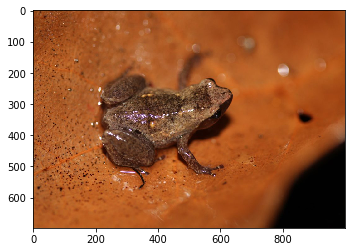

In [19]:
import requests
from PIL import Image

url = 'http://www.edgeofexistence.org/wp-content/uploads/2017/06/Anilany-helenae_KMullin-1000x697.jpg'
# url = 'http://s3.amazonaws.com/lab-notes-media/blog/wp-content/uploads/2017/05/top6-weirdants1.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

In [20]:
transform = transforms.Compose([transforms.ToTensor()])
t_img = transform(img)
t_img = t_img.unsqueeze(0)

In [21]:
def display_image_applying_filter(img, filters, grayscale=False):
    max_images_per_row = 6
    fig = plt.figure(figsize=(25, 30))
    for idx, filter in enumerate(filters, start=1):
        f = filter.unsqueeze(0)
        f_img = F.conv2d(img, f, stride=1, padding=1)
        f_img = f_img.squeeze(0).squeeze(0)
        f_img = f_img.clone().detach().numpy()
        ax = fig.add_subplot(math.ceil(len(filters)/max_images_per_row), max_images_per_row, idx)
        if grayscale:
            plt.imshow(f_img, cmap='Greys',  interpolation='nearest')
        else:
            plt.imshow(f_img)

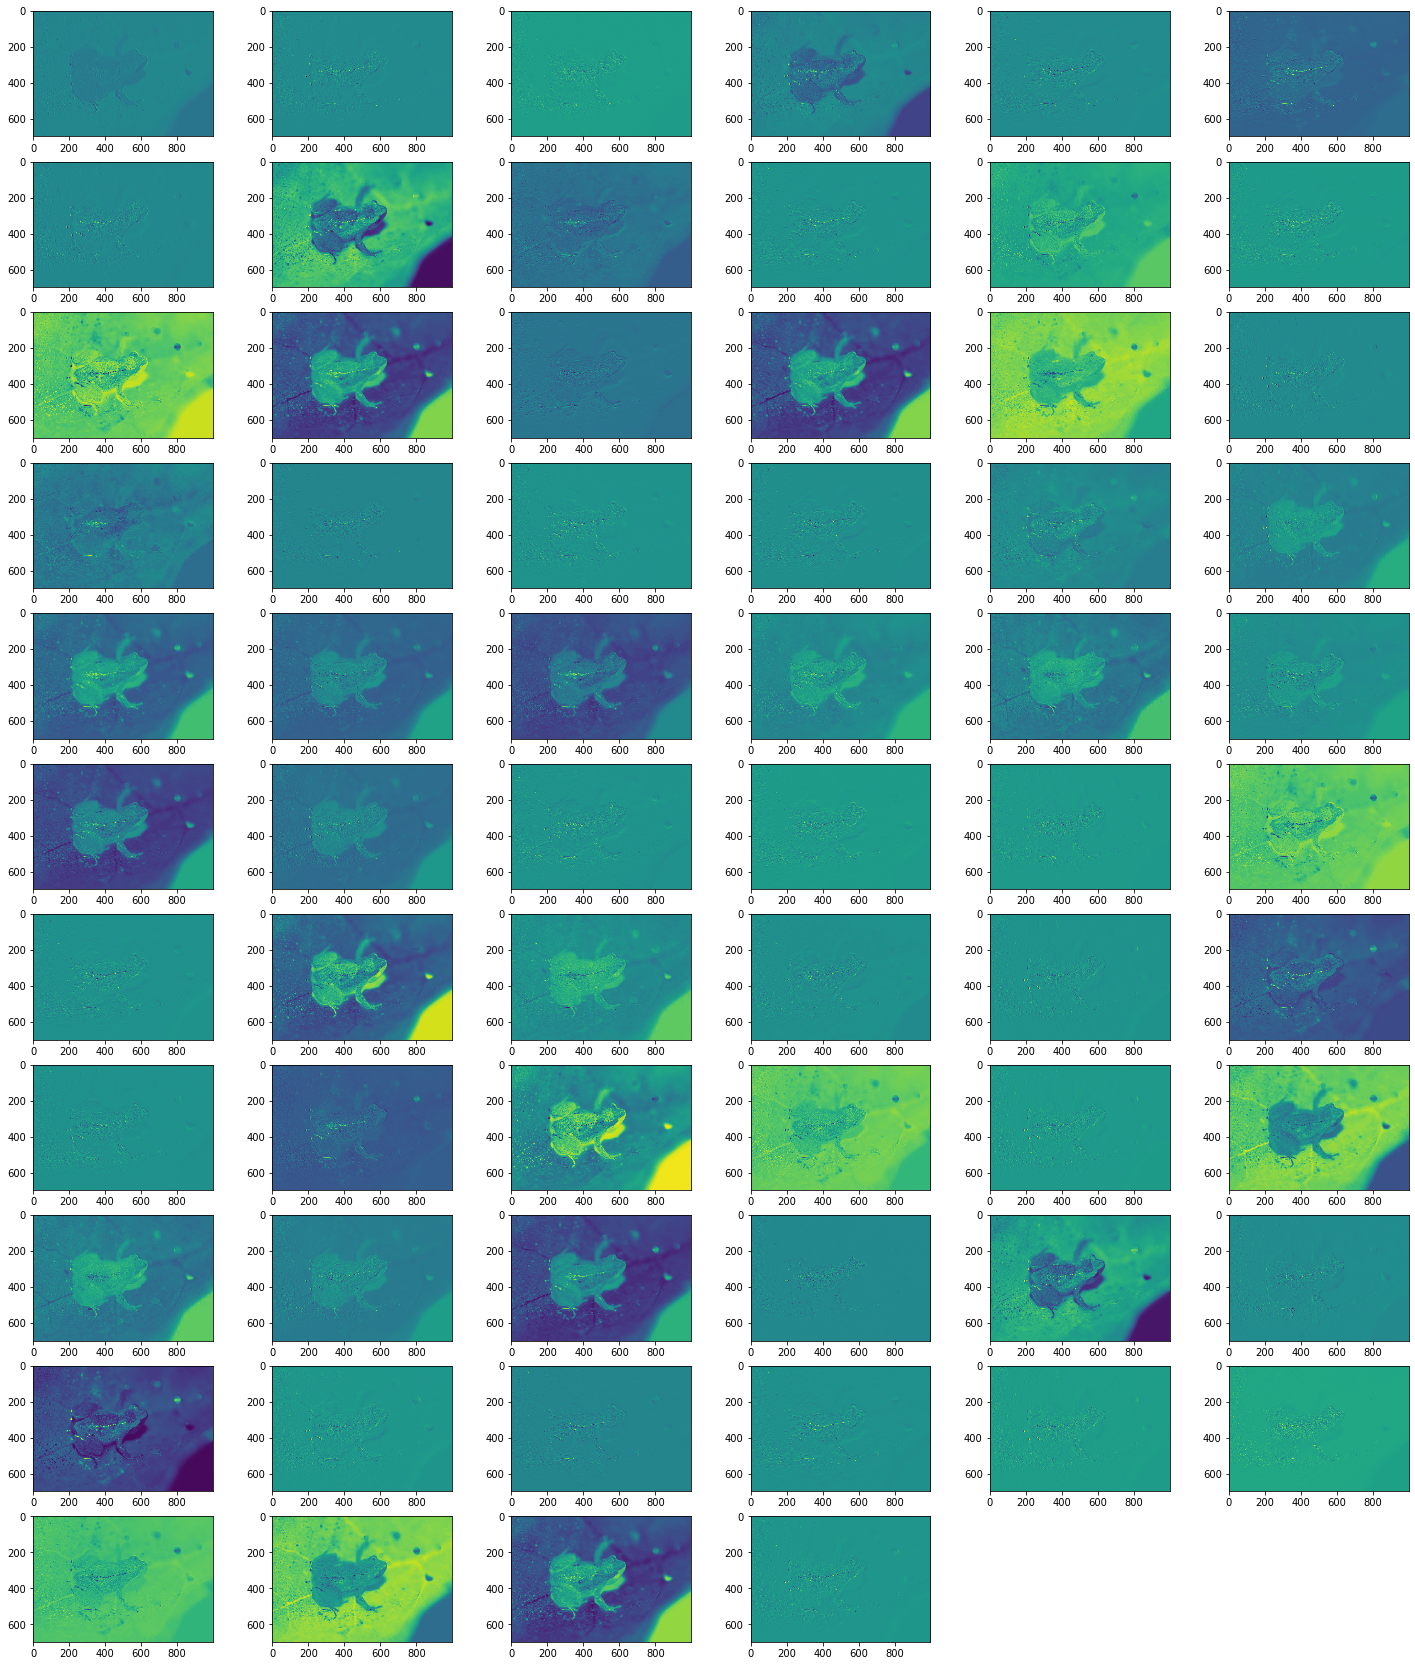

In [22]:
display_image_applying_filter(t_img, filters)

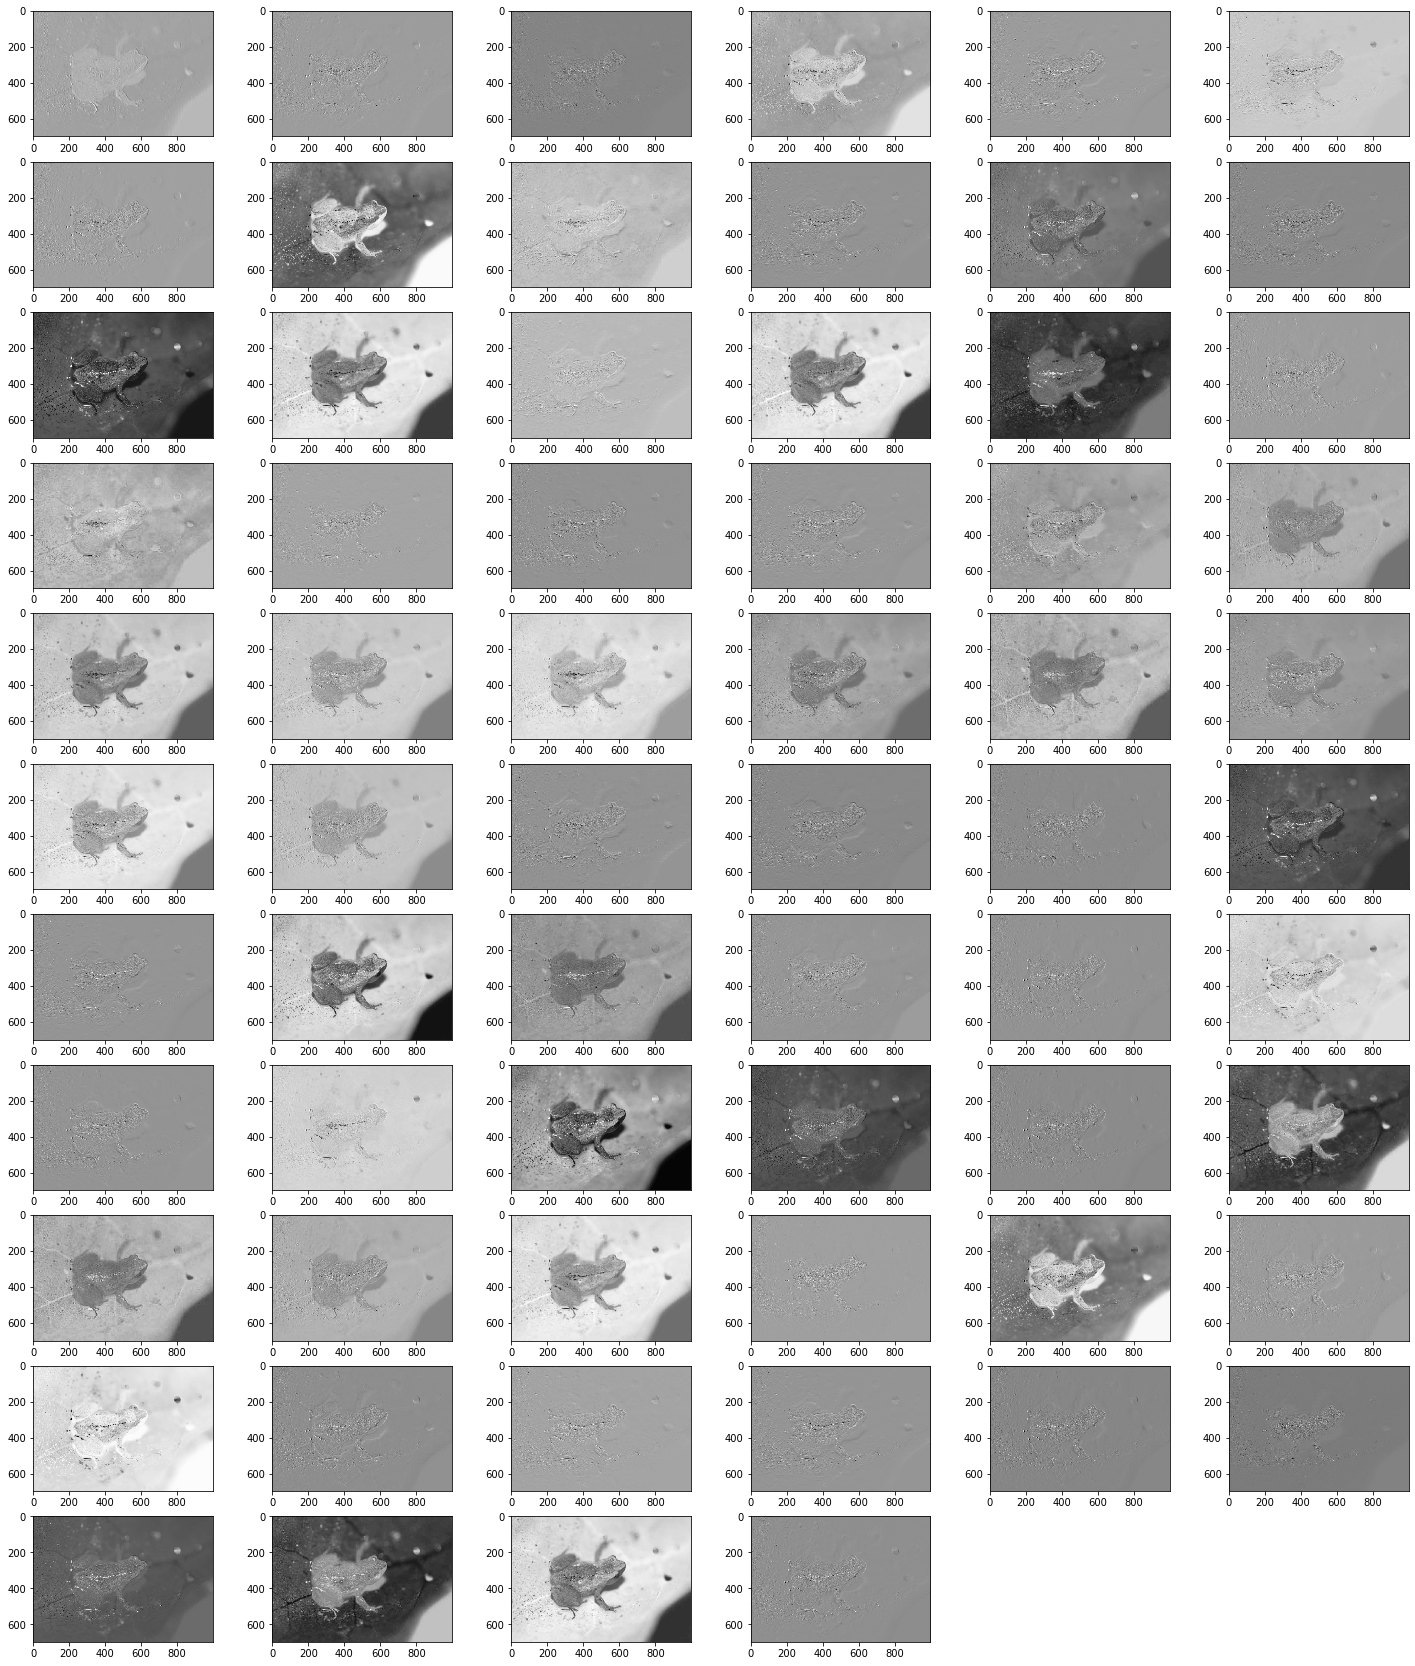

In [23]:
display_image_applying_filter(t_img, filters, grayscale=True)